In [218]:
import sys
import sklearn
import pandas as pd
import numpy as np
import os
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline
import matplotlib as plt
import matplotlib.pyplot as plt
plt.rc('axes', labelsize=14)
plt.rc('xtick', labelsize=12)
plt.rc('ytick', labelsize=12)

# Ignore useless warnings 
import warnings
warnings.filterwarnings(action="ignore", message="^internal gelsd")

In [219]:
df = pd.read_csv("../training_data/training_set.csv")


In [220]:
df.describe()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RISK_MM
count,109120.000000,109401.000000,108552.000000,64238.000000,59817.000000,102156.000000,108459.000000,107885.000000,108482.000000,107606.000000,98777.000000,98822.000000,68957.000000,67120.000000,108943.000000,108115.000000,109641.000000
mean,12.269056,23.325253,2.338656,5.449992,7.625088,39.967276,13.979126,18.626139,68.760117,51.391428,1017.756512,1015.368863,4.391084,4.453159,17.055043,21.801296,2.348823
std,6.396149,7.129078,8.472995,4.143162,3.801504,13.523854,8.888911,8.802497,19.119738,20.845954,7.135869,7.072839,2.879251,2.712643,6.499561,6.959340,8.490714
min,-8.500000,-4.100000,0.000000,0.000000,0.000000,6.000000,0.000000,0.000000,0.000000,0.000000,980.500000,979.000000,0.000000,0.000000,-6.200000,-5.100000,0.000000
25%,7.700000,18.000000,0.000000,2.600000,4.800000,31.000000,7.000000,13.000000,57.000000,36.000000,1012.900000,1010.500000,1.000000,2.000000,12.400000,16.700000,0.000000
50%,12.100000,22.700000,0.000000,4.800000,8.500000,39.000000,13.000000,19.000000,70.000000,52.000000,1017.700000,1015.300000,5.000000,5.000000,16.800000,21.200000,0.000000
75%,16.900000,28.400000,0.600000,7.400000,10.700000,48.000000,19.000000,24.000000,83.000000,66.000000,1022.600000,1020.200000,7.000000,7.000000,21.600000,26.500000,0.600000
max,33.900000,48.100000,371.000000,82.400000,14.500000,135.000000,130.000000,87.000000,100.000000,100.000000,1041.000000,1039.600000,9.000000,8.000000,40.200000,46.700000,371.000000


In [221]:
df = df.drop("RISK_MM", axis = 1)

In [222]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 109641 entries, 0 to 109640
Data columns (total 23 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Date           109641 non-null  object 
 1   Location       109641 non-null  object 
 2   MinTemp        109120 non-null  float64
 3   MaxTemp        109401 non-null  float64
 4   Rainfall       108552 non-null  float64
 5   Evaporation    64238 non-null   float64
 6   Sunshine       59817 non-null   float64
 7   WindGustDir    102101 non-null  object 
 8   WindGustSpeed  102156 non-null  float64
 9   WindDir9am     101715 non-null  object 
 10  WindDir3pm     106927 non-null  object 
 11  WindSpeed9am   108459 non-null  float64
 12  WindSpeed3pm   107885 non-null  float64
 13  Humidity9am    108482 non-null  float64
 14  Humidity3pm    107606 non-null  float64
 15  Pressure9am    98777 non-null   float64
 16  Pressure3pm    98822 non-null   float64
 17  Cloud9am       68957 non-null

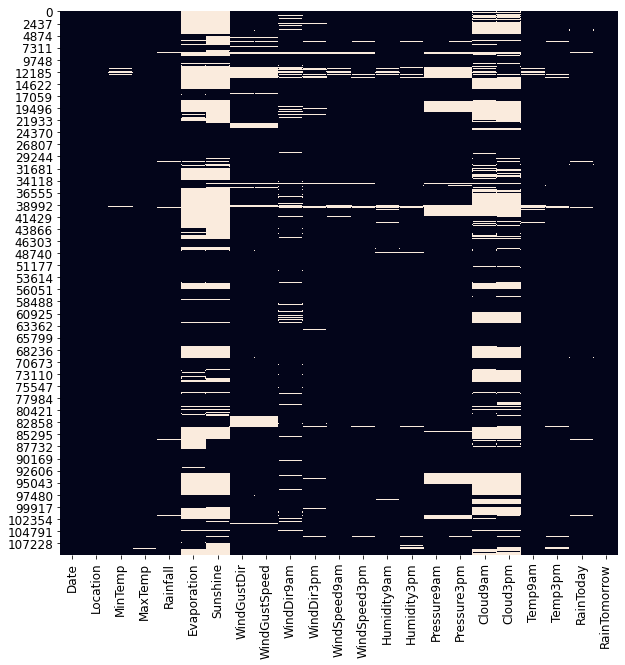

In [145]:
plt.figure(figsize=(10,10))
sns.heatmap(df.isnull(),cbar=False)

In [223]:
# categorical and numerical varialbes

num_columns = [ col for col in df.columns if df[col].dtype=="float64"]
cat_columns = [col for col in df.columns if df[col].dtype=="O"]

num_variables = df[num_columns]
cat_variables = df[cat_columns]

In [224]:
print ('numericalcolumns:', num_columns) 
print ('\n categorical columns:', cat_columns)

numericalcolumns: ['MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation', 'Sunshine', 'WindGustSpeed', 'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm', 'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am', 'Temp3pm']

 categorical columns: ['Date', 'Location', 'WindGustDir', 'WindDir9am', 'WindDir3pm', 'RainToday', 'RainTomorrow']


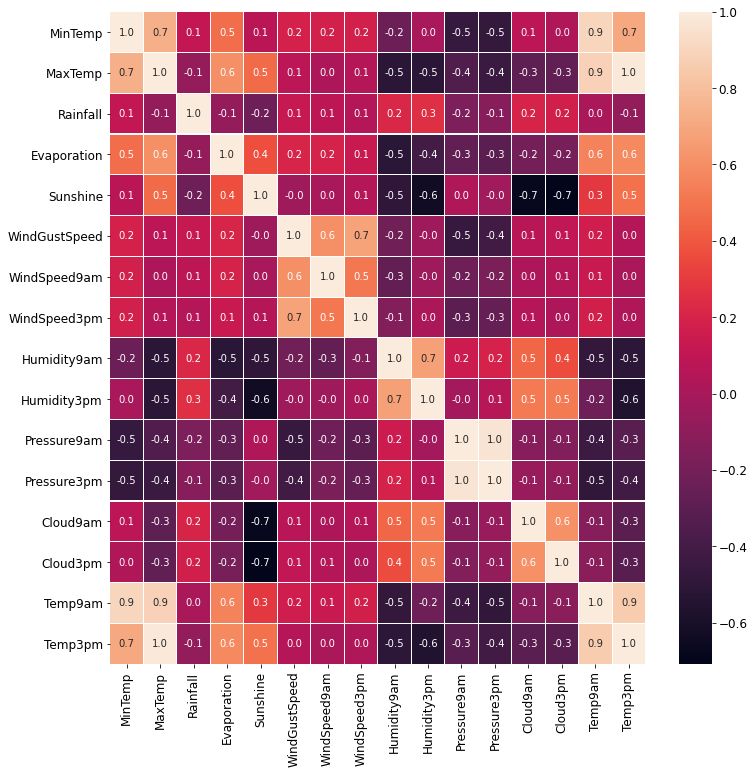

In [148]:
matrix_corr = df.corr()
fig = plt.figure(figsize=(12,12))
sns.heatmap(matrix_corr,annot=True, fmt=".1f",linewidths="0.1")

#### observations from the matrix
* Pressure9am and Pressure3pm have very strong correlation(almost 1)
* MinTemp, MaxTemp, Temp9am, Temp3pm have strong correlation between them.
* WindGustSpeed, WindSpeed9am, WindSpeed3pm have moderate correlation between them. 
* Humidity9am, Humidity3pm have moderate correlation between them.
* Cloud9am, Cloud3pm have moderate correlation between them.

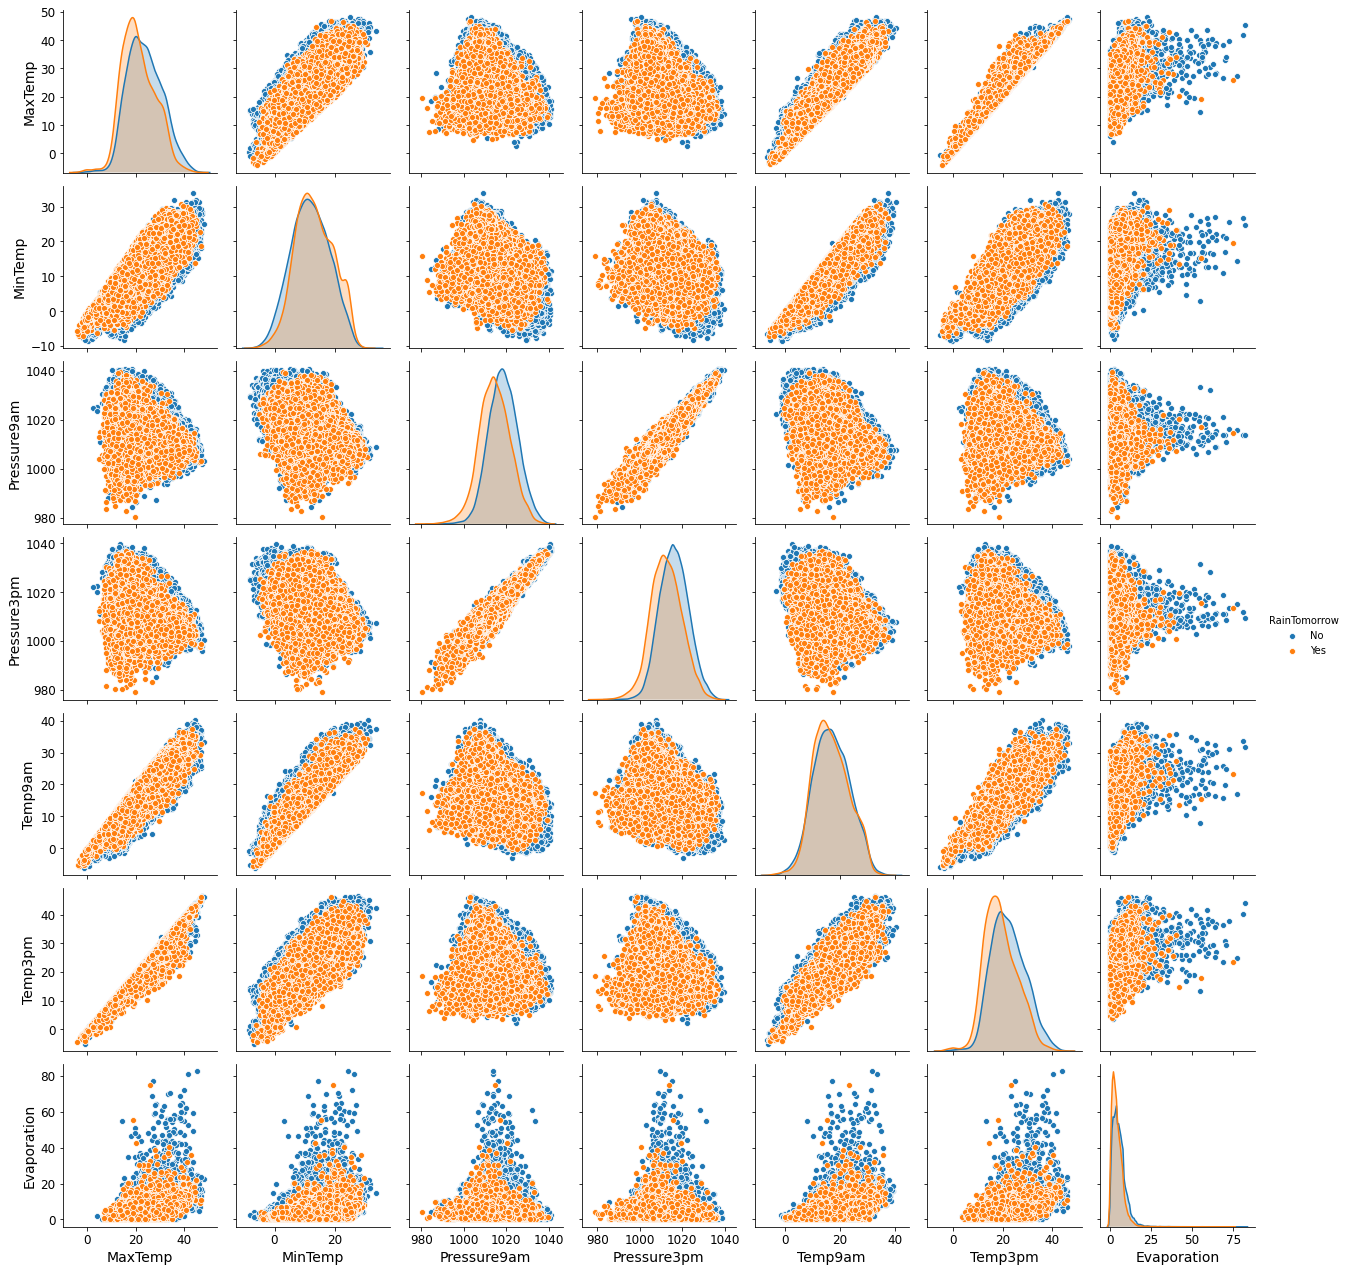

In [243]:
sns.pairplot( data=df, vars=('MaxTemp','MinTemp','Pressure9am','Pressure3pm', 'Temp9am', 'Temp3pm', 'Evaporation'), hue='RainTomorrow' )

In [244]:
# handing missing values on numerical variables

from sklearn.impute import SimpleImputer

imputer = SimpleImputer(strategy = "median")
a = imputer.fit_transform(num_variables)
num_var = pd.DataFrame(a, columns = num_columns, index = df.index)

In [245]:
Q1 = num_var.quantile(0.25)
Q3 = num_var.quantile(0.75)
IQR = Q3 - Q1
print(IQR)

MinTemp           9.2
MaxTemp          10.3
Rainfall          0.6
Evaporation       1.4
Sunshine          0.9
WindGustSpeed    15.0
WindSpeed9am     12.0
WindSpeed3pm     11.0
Humidity9am      26.0
Humidity3pm      28.0
Pressure9am       8.5
Pressure3pm       8.5
Cloud9am          3.0
Cloud3pm          2.0
Temp9am           9.2
Temp3pm           9.6
dtype: float64


In [246]:
# handling missing values on categorical variables
cat_var= cat_variables.fillna(cat_variables.mode().iloc[0])

In [250]:
# Convert categorical features to continuous features with Label Encoding
from sklearn.preprocessing import LabelEncoder
lencoders = {}
for col in cat_var.select_dtypes(include=['object']).columns:
    lencoders[col] = LabelEncoder()
    cat_var[col] = lencoders[col].fit_transform(cat_var[col])

In [251]:
cat_var

,Date,Location,WindGustDir,WindDir9am,WindDir3pm,RainToday,RainTomorrow
0,706,2,13,13,14,0,0
1,794,2,14,6,15,0,0
2,882,2,15,13,15,0,0
3,906,2,4,9,0,0,0
4,914,2,13,1,7,0,0
...,...,...,...,...,...,...,...
109636,1959,41,0,2,0,0,0
109637,1967,41,0,9,1,0,0
109638,1975,41,6,9,3,0,0
109639,1983,41,3,9,14,0,0


In [252]:
# numeric variables feature scalling
from sklearn.preprocessing import MinMaxScaler,PolynomialFeatures

scaler = MinMaxScaler()
scalled = scaler.fit_transform(num_var)
num_var = pd.DataFrame(scalled, columns = num_columns, index = df.index)


In [255]:
df_prepared = pd.concat([num_var,cat_var], axis=1)

In [256]:
df_prepared

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,...,Cloud3pm,Temp9am,Temp3pm,Date,Location,WindGustDir,WindDir9am,WindDir3pm,RainToday,RainTomorrow
0,0.516509,0.517241,0.001617,0.058252,0.586207,0.294574,0.153846,0.275862,0.71,0.22,...,0.625,0.497845,0.519305,706,2,13,13,14,0,0
1,0.375000,0.559387,0.000000,0.058252,0.586207,0.294574,0.030769,0.252874,0.44,0.25,...,0.625,0.504310,0.567568,794,2,14,6,15,0,0
2,0.504717,0.570881,0.000000,0.058252,0.586207,0.310078,0.146154,0.298851,0.38,0.30,...,0.250,0.586207,0.546332,882,2,15,13,15,0,0
3,0.417453,0.614943,0.000000,0.058252,0.586207,0.139535,0.084615,0.103448,0.45,0.16,...,0.625,0.523707,0.610039,906,2,4,9,0,0,0
4,0.613208,0.697318,0.002695,0.058252,0.586207,0.271318,0.053846,0.229885,0.82,0.33,...,1.000,0.517241,0.671815,914,2,13,1,7,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
109636,0.283019,0.496169,0.000000,0.058252,0.586207,0.193798,0.115385,0.149425,0.59,0.27,...,0.625,0.336207,0.501931,1959,41,0,2,0,0,0
109637,0.266509,0.526820,0.000000,0.058252,0.586207,0.193798,0.100000,0.126437,0.51,0.24,...,0.625,0.351293,0.530888,1967,41,0,9,1,0,0
109638,0.285377,0.563218,0.000000,0.058252,0.586207,0.124031,0.100000,0.103448,0.56,0.21,...,0.625,0.368534,0.571429,1975,41,6,9,3,0,0
109639,0.327830,0.593870,0.000000,0.058252,0.586207,0.240310,0.069231,0.103448,0.53,0.24,...,0.625,0.403017,0.602317,1983,41,3,9,14,0,0


In [259]:

X = df_prepared.drop(["RainTomorrow"], axis = 1)
y = df_prepared['RainTomorrow']


In [264]:
# training the models

from sklearn.metrics import accuracy_score, f1_score
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression, SGDClassifier
import warnings
warnings.filterwarnings("ignore")

clf_a = DecisionTreeClassifier(random_state = 0)
clf_b = RandomForestClassifier(random_state = 0)
clf_c = LogisticRegression(random_state = 0)
clf_d = SGDClassifier(random_state = 0)

list_clf = [clf_a, clf_b, clf_c, clf_d]

results = []
for clf in list_clf:
    clf_name = clf.__class__.__name__
    scores_f1 = cross_val_score(clf, X, y, cv=5, scoring = 'f1')
    scores_ = cross_val_score(clf, X, y, cv=5)

    results.append([clf_name, np.mean(scores_f1), np.mean(scores_)])

df_results = pd.DataFrame(np.array(results))
df_results.columns = ['Classifier', 'F1-Score', 'Accuracy']
df_results.sort_values(by=['F1-Score'], ascending=False)




,Classifier,F1-Score,Accuracy
1,RandomForestClassifier,0.580247044698914,0.8445654364557409
0,DecisionTreeClassifier,0.4886413789916134,0.7564688036940018
2,LogisticRegression,0.4265901941817388,0.8091954268717279
3,SGDClassifier,0.37377317984710406,0.7820156528509331


In [ ]:
# feature selection with Random Forest
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

clf_feature_importance = DecisionTreeClassifier(random_state=0)
model_feature_importance = clf_feature_importance.fit(X_train,y_train)
importances = model_feature_importance.feature_importances_

df_feature_importance = pd.DataFrame()
df_feature_importance['features'] = X.columns
df_feature_importance['importances'] = importances
df_feature_importance = df_feature_importance.sort_values(by=['importances'], ascending=False)
features = list(df_feature_importance['features'].values)

list_n_features = [10,20,30,40,50,60]

results_features = []
for i in list_n_features:
    X_selected_features = X[features[0:i]]
    scores_f1 = cross_val_score(LogisticRegression(random_state=0), X_selected_features, y, cv=5, scoring = 'f1')
    scores_ = cross_val_score(LogisticRegression(random_state=0), X_selected_features, y, cv=5)
    cummulative_importance = sum(df_feature_importance.importances[0:i])
    results_features.append([i, cummulative_importance, np.mean(scores_f1), np.mean(scores_)])

df_results_features = pd.DataFrame(np.array(results_features))
df_results_features.columns = ['Number of features', 'Cumulative Importance','F1-Score', 'Accuracy']
df_results_features.sort_values(by=['F1-Score'], ascending=False)
